# 4. Exploratory Data Analysis

**탐색적 데이터 분석을 통해 데이터를 통달해봅시다.** with [Titanic Data](https://www.kaggle.com/c/titanic)

0. 라이브러리 준비
1. 분석의 목적과 변수 확인
2. 데이터 전체적으로 살펴보기
3. 데이터의 개별 속성 파악하기

# 탐색적 데이터 분석 - EDA
## EDA?
데이터를 분석하는 기술적 접근은 매우 많다. CNN, RNN, ...다양한 인공지능 기술들이 쏟아져나온다. 하지만 데이터가 가지는 본질적인 의미를 망각해서는 안된다. EDA는 데이터 그 자체에 적성과 특성을 요목조목 육안으로 확인하는 과정, 데이터 그 자체만으로부터 인사이트(시각화, 통계적 수치, numpy/pandas의 여러 컨테이너들)를 얻어내는 접근법이다!  

## EDA의 Process
1. 분석의 목적(명확하게!)과 변수 확인(즉, column을 확인하는 것)
2. 데이터 전체적으로 살펴보기 (상관관계 분석, 결측치 즉 NA가 없는지)
3. 데이터의 개별 속성 파악하기(feature 등)

## EDA with Example - Titanic
https://www.kaggle.com/c/titanic  
머신러닝의 굉장히 유명한 데이터셋인 타이타닉 데이터셋이다. 데이터에서 얻을 수 있는 정보가 굉장히 많고, 적용해볼 수 있는 머신러닝 테크닉이 정말 많은 훌륭한 데이터셋이다. (컴퓨티 비전에서 자주 쓰이는 레나씨의 사진이 떠오른다..)  

## 0. 라이브러리 준비

In [2]:
## 라이브러리 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline # matplotlib 라이브러리를 인라인 환경에서 사용함을 반드시 명시


In [3]:
## 동일 경로에 "train.csv"가 있다면:
## 데이터 불러오기

titanic_df = pd.read_csv("./titanic/train.csv")

## 1. 분석의 목적과 변수 확인
- 살아남은 사람들은 어떤 특징을 가지고 있었을까?  
- Kaggle 사이트의 타이타닉 데이터셋에서 Data > Data Dictionary, Variable Notes를 확인한다.  

In [5]:
## 상위 5개 데이터 확인하기
titanic_df.head(5)
# NaN은 결측치이다. 결측치는 중요한 단서이다. 이것을 메꿔야할 수도 있고, 이 결측치가 의미있는 것일수도 있다.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
## 각 Column의 데이터 타입 확인하기

titanic_df.dtypes
# object는 이름이나 성별이다.

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 2. 데이터 전체적으로 살펴보기

In [8]:
## 데이터 전체 정보를 얻는함수 : .describe()

titanic_df.describe() # 수치형 데이터에 대한 요약만을 제공
# 따라서 아까에 비해 column이 줄어들었다!

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
## 상관계수 확인!

titanic_df.corr() # 상관계수 행렬 출력
# Pclass와 Survived의 상관계수도 눈여겨볼 만 하다.
# Pclass와 Fare의 경우 비쌀수록 높은 클래스의 좌석을 이용했을 것이므로 음의 큰 상관관계가 나온다.

# Correlation is NOT Causation

# 상관성 : A up, B up, ... (A가 증가하면 B도 증가하는 경향성 등을 나타내는 수치)
# 인과성 : A -> B (A로부터 B가 발생한다는 종속관계를 의미)
# 이 두가지를 꼭 구분해서 사용해야 한다.
# 상관계수가 유의미하게 나왔다고 해서 이 둘 사이에 인과성이 꼭 존재하는 것은 아니다.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [11]:
## 결측치 확인

titanic_df.isnull().sum()
# Age, Cabin, Embarked에 결측치 발견!

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3. 데이터의 개별 속성 파악하기

### 1. Survived Column

In [17]:
## 생존자, 사망자 명수는?

titanic_df['Survived'].sum() # 생존자 명수

342

In [16]:
titanic_df['Survived'].value_counts() # 사망자, 생존자 명수

0    549
1    342
Name: Survived, dtype: int64

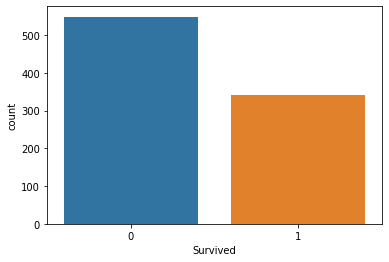

In [19]:
## 생존자수와 사망자수를 Barplot으로 그려보기
## sns.countplot()사용. seaborn이 깔끔하다~

sns.countplot(x='Survived', data=titanic_df) # 0은 사망자, 1은 생존자
plt.show()

### 2. Pclass

In [21]:
# Pclass에 따른 인원 파악
titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


In [23]:
# Pclass에 따른 생존자 인원은 어떻게 알 수 있을까?
titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).sum()
# survived가 1인 개수를 이렇게 셀 수 있다!

,Survived
Pclass,
1,136
2,87
3,119


In [24]:
# 생존 비율?
# sum/count이다.
titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean()
# Pclass가 높을수록 생존률이 높은 상관관계가 있음을 알 수 있다.

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


[]

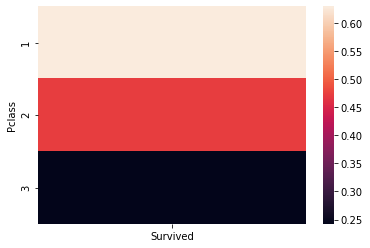

In [25]:
# 히트맵 활용
sns.heatmap(titanic_df[['Pclass','Survived']].groupby(['Pclass']).mean())
plt.plot()

### Sex

In [27]:
titanic_df[['Sex', 'Survived']]

,Sex,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
...,...,...
886,male,0
887,female,1
888,female,0
889,male,1


In [30]:
# groupby의 기준을 두개를 적용시키기.
titanic_df.groupby(['Survived', 'Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

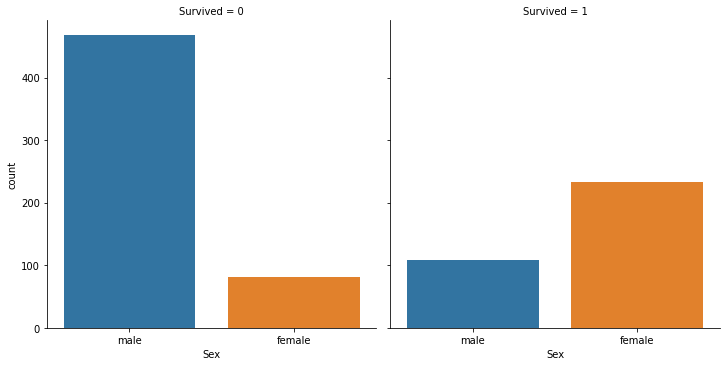

In [32]:
# sns.catplot
# col : survived에 대한 케이스 분류
# x : 가로축 plot에 대한 기준
# kind : countplot을 이용함
sns.catplot(x='Sex', col='Survived', kind='count', data=titanic_df)
plt.show()
# 인사이트 : 남성이 더 많이 죽음, 여성이 더 많이 살아남음

### 4. Age
#### Remind : 결측치 존재!

In [34]:
titanic_df.describe()['Age']

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

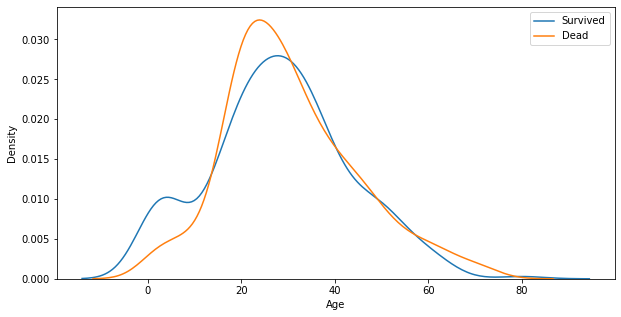

In [40]:
## Survived 1, 0과 Age의 경향성

fig, ax = plt.subplots(1, 1, figsize=(10, 5)) 
# 1, 1는 가로엔 몇개, 세로엔 몇개의 그래프를 그릴 것인지.
# 한 axis 위에 두개의 그래프를 그릴 것이다.
sns.kdeplot(x=titanic_df[titanic_df.Survived == 1]['Age'], ax=ax)
sns.kdeplot(x=titanic_df[titanic_df.Survived == 0]['Age'], ax=ax)

plt.legend(['Survived', 'Dead']) # 범위
 
plt.show()

# 인사이트 : 어린아이들 경우 생존 비율이 높음. 20~30대 청년들은 사망 비율이 높음. 고령층의 경우 사망 비율이 높다.

### Appendix 1. Sex + Pclass vs Survived

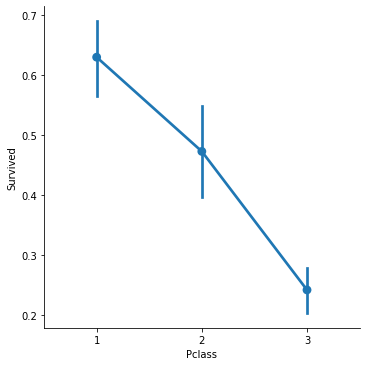

In [41]:
sns.catplot(x='Pclass', y='Survived', kind='point', data=titanic_df)
plt.show()
# 포인트 그래프의 경우 점이 추정치를 의미한다.
# 막대기는 신뢰구간이다.
# Pclass가 1일수록 생존률이 높음을 알 수 있다.

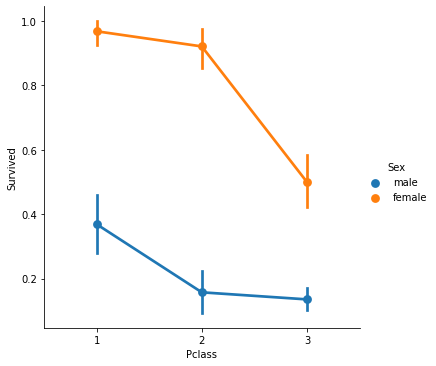

In [42]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='point', data=titanic_df)
plt.show()
# hue를 성별로 줌으로써 두가지 그래프를 그릴 수 있다.
# 여성이면서 1등석이면 생존률이 거의 1, 매우 높다. 반면 남성은 낮다.
# 여러 컬럼에 따라 이렇게 분석해보는 것도 중요하다.

## Appendix 2. Age + Pclass

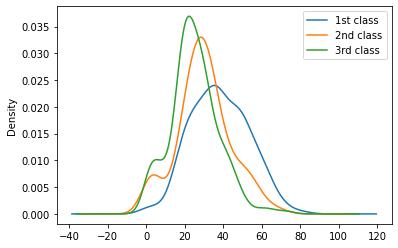

In [47]:
## Age graph with Pclass

titanic_df['Age'][titanic_df.Pclass == 1].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass == 2].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass == 3].plot(kind='kde')

plt.legend(['1st class', '2nd class', '3rd class']) # 범주
# Pclass별로 Age 그래프를 그릴 수 있다.

# 인사이트 : 높은 클래스일수록 나이대가 더 높아진다.

## Mission : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? Sibsp? Parch?

### 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

함께 보면 좋은 라이브러리 document
- [numpy]()
- [pandas]()
- [seaborn]()
- [matplotlib]()

무대뽀로 하기 힘들다면? 다음 Hint와 함께 시도해봅시다:
1. 데이터를 톺아봅시다.
- 각 데이터는 어떤 자료형을 가지고 있나요?
- 데이터에 결측치는 없나요? -> 있다면 이를 어떻게 메꿔줄까요?
- 데이터의 자료형을 바꿔줄 필요가 있나요? -> 범주형의 One-hot encoding
2. 데이터에 대한 가설을 세워봅시다.
- 가설은 개인의 경험에 의해서 도출되어도 상관이 없습니다.
- 가설은 명확할 수록 좋습니다. ex) Titanic Data에서 Survival 여부와 성별에는 상관관계가 있다!
3. 가설을 검증하기 위한 증거를 찾아봅시다.
- 이 증거는 한 눈에 보이지 않을 수 있습니다. 우리가 다룬 여러 Technique를 써줘야 합니다.
- `groupby()`를 통해서 그룹화된 정보에 통계량을 도입하면 어떨까요?
- 시각화를 통해 일목요연하게 보여주면 더욱 좋겠죠?

In [269]:
# 라이브러리 선언
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [270]:
# 데이터 불러오기
data = pd.read_csv('./bestsellers with categories.csv')
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


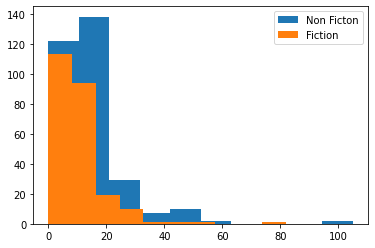

In [271]:
# Non Fiction과 Fiction장르의 가격차이

plt.hist(data[data['Genre']=='Non Fiction']['Price'])
plt.hist(data[data['Genre']=='Fiction']['Price'])
plt.legend(['Non Ficton', 'Fiction'])

plt.show()
# 전반적으로 Non Fiction인 책이 Fiction인 책보다 가격대가 높음을 알 수 있다.
# Non Fiction인 책의 경우 전문서적 등이 많이 포함되어 Fiction인 책보다 가격대가 높은 게 않을까?

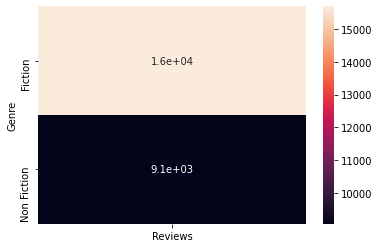

In [272]:
# Non Fiction과 Fiction장르의 리뷰차이
sns.heatmap(data[['Genre','Reviews']].groupby(['Genre']).mean(), annot=True)
plt.show()
# Fiction이 Non Fiction보다 리뷰가 많은 것을 알 수 있다.

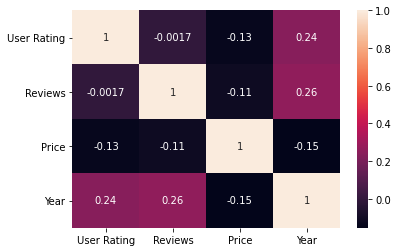

In [273]:
sns.heatmap(data.corr(), annot=True)
plt.show()

# 음.. 딱히 건져낼만한 유의미한 Feature을 더 찾기 힘들어서 다른 데이터셋으로 해보았다. 강한 상관관계가 보이지 않는다.
### 상관계수에 대하여
- -1에 가까운 값이 얻어지면 : 누가 봐도 매우 강력한 음(-)의 상관. 오히려 너무 확고하기 때문에 사회과학 데이터일 경우 데이터를 조작한 게 아닌가 의심할 정도이다. 물론 이건 사회과학 얘기고 순수학문에 가까운 분야일수록 요구되는 상관관계는 높은 편.
- -0.5 정도의 값이 얻어지면 : 강력한 음(-)의 상관. 연구자는 변인 x 가 증가하면 변인 y 가 감소한다고 자신 있게 말할 수 있다.
- -0.2 정도의 값이 얻어지면 : 음(-)의 상관이긴 한데 너무 약해서 모호하다. 상관관계가 없다고는 할 수 없지만 좀 더 의심해 봐야 한다.
- 0 정도의 값이 얻어지면 : 대부분의 경우, 상관관계가 있을거라고 간주되지 않는다. 다른 후속 연구들을 통해 뒤집어질지는 모르지만 일단은 회의적이다. 하지만 무조건적으로 그런건 아니라 2차 방정식 그래프와 비슷한 모양이 될 경우 상관관계는 있으나 상관계수는 0에 가깝게 나온다.
- 0.2 정도의 값이 얻어지면 : 너무 약해서 의심스러운 양(+)의 상관. 이것만으로는 상관관계에 대해 아주 장담할 수는 없다. 하지만 사회과학에선 매우 큰 상관관계가 있는 것으로 간주한다.
- 0.5 정도의 값이 얻어지면 : 강력한 양(+)의 상관. 변인 x 가 증가하면 변인 y 가 증가한다는 주장은 이제 통계적으로 지지받고 있다.
- 1에 가까운 값이 얻어지면 : 이상할 정도로 강력한 양(+)의 상관. 위와 마찬가지로, 이렇게까지 확고한 상관관계는 오히려 쉽게 찾아보기 어렵다.

# Word Happiness Report 데이터셋
### https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
- pandas API레퍼런스
### http://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot
- seaborn API레퍼런스

In [274]:
data15 = pd.read_csv('./word_happiness_report/2015.csv')
data16 = pd.read_csv('./word_happiness_report/2016.csv')
data17 = pd.read_csv('./word_happiness_report/2017.csv')
data18 = pd.read_csv('./word_happiness_report/2018.csv')
data19 = pd.read_csv('./word_happiness_report/2019.csv')
# data = pd.concat([data15,data16,data17,data18,data19])
# data
# sns.heatmap(data.corr(), annot=True)
# 위와 같이 5개의 데이터를 한번에 합쳤더니 column도 다 다르고, 결측치도 많아서 엄청나게 더러워졌다 ㅠ
# 일단 각 column을 살펴보면서 정리해줘야겠다! 버릴 건 drop하고, 의미가 같지만 이름이 다른 column끼리는 통합해주고.

In [275]:
data15.head(5)
# Standard Error는 2015년에만 존재한다.
# Dystopia Residual도 2015년과 2016년에만 존재한다. 2017년의 Dystopia.Residual와 같다.
# Region은 2015, 2016년에만 있다.
# Country는 다른 연도의 Country or region과 같은 내용을 담고 있다.
# Overall rank == Happiness Rank


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [276]:
data16.head(5)
# Dystopia Residual도 2015년과 2016년에만 존재한다. 2017년의 Dystopia.Residual와 같다.
# Region은 2015, 2016년에만 있다.
# Country는 다른 연도의 Country or region과 같은 내용을 담고 있다.
# Lower Confidence Interval은 2016년에만 있다.
# Upper Confidence Interval도 2016년에만 있다.
# Overall rank == Happiness Rank

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [277]:
data17.head(5)
# Country는 다른 연도의 Country or region과 같은 내용을 담고 있다.
# Whisker.high는 2017년에만 있다.
# Whisker.low도 2017년에만 있다.
# Dystopia.Residual는 2017년에만 있다. 2015,1016년의 Dystopia Residual와 같다.
# Overall rank == Happiness Rank

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [278]:
data18.head(5)
# Country or region은 다른 연도의 Country와 같은 내용을 담고 있다.
# Overall rank == Happiness Rank

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [279]:
data19.head(5)
# Country or region은 다른 연도의 Country와 같은 내용을 담고 있다.
# Overall rank == Happiness Rank

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### 이제 모든 연도에 있지 않은 column들은 삭제해줄건데, del과 drop중 뭐를 쓰는게 좋을지 몰라서 찾아봤다.
del은 "remove an item from a list"라며 list를 기준으로 remove가 일어납니다. drop은 pandas.DataFrame.drop method로서 pandas에 특화되어 있기 때문에 drop을 사용하는걸 추천드립니다.  
라고 나오길래 drop을 쓰기로 했다..!  
사용된 파라미터는 다음과 같다(판다스 API레퍼런스에 의하면..)  
- columnssingle label or list-like
    - Alternative to specifying axis (labels, axis=1 is equivalent to columns=labels).
- nplacebool, default False
    - If False, return a copy. Otherwise, do operation inplace and return None.
- errors{‘ignore’, ‘raise’}, default ‘raise’
    - If ‘ignore’, suppress error and only existing labels are dropped.
- axis{0 or ‘index’, 1 or ‘columns’}, default 0
    - Whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’).

In [280]:
data15.drop(columns="Standard Error",inplace=True,errors="ignore", axis=1)
data15.drop(columns="Dystopia Residual",inplace=True,errors="ignore", axis=1)
data15.drop(columns="Region",inplace=True,errors="ignore", axis=1)

data16.drop(columns="Lower Confidence Interval",inplace=True,errors="ignore", axis=1)
data16.drop(columns="Upper Confidence Interval",inplace=True,errors="ignore", axis=1)
data16.drop(columns="Dystopia Residual",inplace=True,errors="ignore", axis=1)
data16.drop(columns="Region",inplace=True,errors="ignore", axis=1)

data17.drop(columns="Whisker.high",inplace=True,errors="ignore", axis=1)
data17.drop(columns="Whisker.low",inplace=True,errors="ignore", axis=1)
data17.drop(columns="Dystopia.Residual",inplace=True,errors="ignore", axis=1)

### 이제 모든 연도에 공통적으로 있는 column들만 남았다.  근데 같은 내용을 담고 있는 column들이라도 이름이 다른 경우가 있어 통일해줘야한다(노가다)

In [281]:
data15=data15.rename(columns={"Country" : "Country or region",
                            "Economy (GDP per Capita)":"GDP per capita",
                            "Health (Life Expectancy)":"Healthy life expectancy",
                            "Trust (Government Corruption)":"Perceptions of corruption"})

In [282]:
data16=data16.rename(columns={"Country" : "Country or region",
                            "Economy (GDP per Capita)":"GDP per capita",
                            "Health (Life Expectancy)":"Healthy life expectancy",
                            "Trust (Government Corruption)":"Perceptions of corruption"})

In [283]:
data17=data17.rename(columns={"Country" : "Country or region",
                            "Happiness.Score":"Happiness Score",
                            "Economy..GDP.per.Capita.":"GDP per capita",
                            "Health..Life.Expectancy.":"Healthy life expectancy",
                            "Trust..Government.Corruption.":"Perceptions of corruption",
                             "Happiness.Rank" : "Happiness Rank"})

In [284]:
data18=data18.rename(columns={"Freedom to make life choices" : "Freedom",
                             "Score" : "Happiness Score",
                             "Social support" : "Family",
                             "Overall rank" : "Happiness Rank"})

In [285]:
data19=data19.rename(columns={"Freedom to make life choices" : "Freedom",
                             "Score" : "Happiness Score",
                             "Social support" : "Family",
                             "Overall rank" : "Happiness Rank"})

In [286]:
alldata = pd.concat([data15,data16,data17,data18,data19])
alldata

,Country or region,Happiness Rank,Happiness Score,GDP per capita,Family,Healthy life expectancy,Freedom,Perceptions of corruption,Generosity
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...,...,...
151,Rwanda,152,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700
152,Tanzania,153,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600
153,Afghanistan,154,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800
154,Central African Republic,155,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500


<AxesSubplot:>

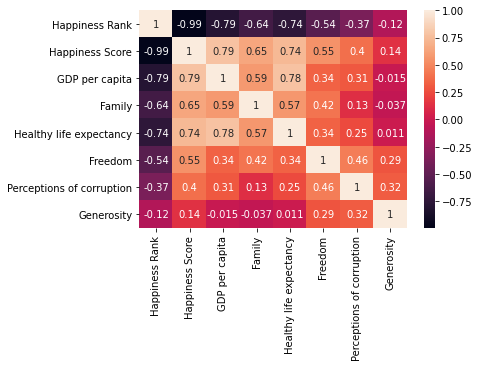

In [287]:
sns.heatmap(alldata.corr(), annot=True)

### 이제 깔끔하게 2015~20019년도를 합쳐서 column간의 상관관계를 파악할 수 있다!!
### 강한 상관관계를 갖는 column들 중, -0.5 또는 0.5에 가까운 값을 갖는 것들
- Happiness Score & Freedom : 0.55
- GDP per capita & Family : 0.59
- Family & Freedom : 0.42
- Healthy life expectanacy & Family : 0.57
- Freedom & Perception of corruption : 0.46
- Freedom & Happiness Rank : -0.54

### 1. Happiness Score & Freedom : 0.55

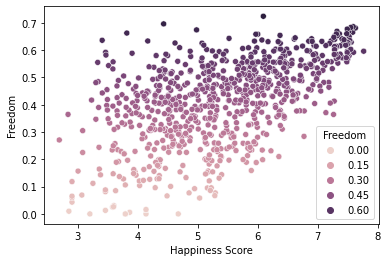

In [293]:
sns.scatterplot(x='Happiness Score', y='Freedom', hue='Freedom', data=alldata)
plt.xlabel('Happiness Score')
plt.ylabel('Freedom')
plt.show()

# 행복지수가 높을수록 자유롭다고 느끼는 사람이 많음을 알 수 있다.

### 2. GDP per capita & Family : 0.59

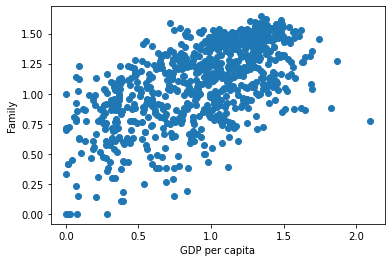

In [289]:
plt.scatter(x=alldata['GDP per capita'], y=alldata['Family'])
plt.xlabel('GDP per capita')
plt.ylabel('Family')
plt.show()

# 1인당 GDP 지수가 높을수록 가족이 많은 경우가 많음을 알 수 있다.

### 3. Family & Freedom : 0.42

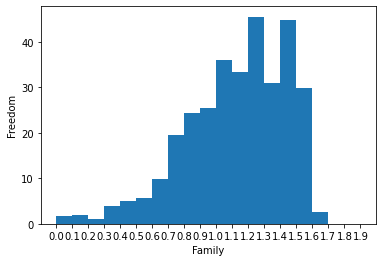

In [324]:
plt.xlabel('Family')
plt.ylabel('Freedom')
plt.hist(x=alldata['Family'], weights=alldata['Freedom'], bins=np.arange(0, 2, 0.1))
plt.xticks(np.arange(0, 2, 0.1)) # Extra : xticks를 올바르게 처리해봅시다.
plt.show()

# 가족이 많을수록 자유를 느끼는 사람들이 많음을 알 수 있다.

### 4. Healthy life expectancy & Family : 0.57

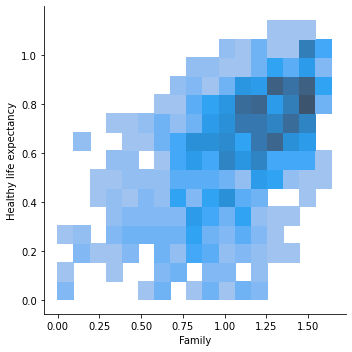

In [307]:
sns.displot(data=alldata, x='Family', y='Healthy life expectancy')
plt.show()

# 가족이 많을수록, 건강한 삶에 대한 기대치가 높음을 알 수 있다.

### 5. Freedom & Perceptions of corruption : 0.46

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seaborn/axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


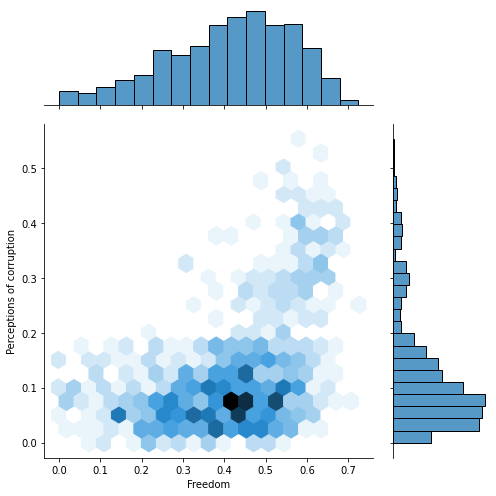

In [342]:
sns.jointplot(alldata['Freedom'],alldata['Perceptions of corruption'],kind="hex",size=7,ratio=3)
plt.show()

# 자유도가 높다고 해서 반드시 국가가 부패했다는 인식이 높은 것은 아니다.
# 하지만 비교적 자유도가 높을 때, 자유도가 낮을 때보다 국가가 부패했다는 비판적인 인식을 갖고 있는 사람들이 많음을 알 수 있다.
# 그리고 자유도가 높을수록 국가의 부패인식 정도가 0부터 0.5까지 넓게 분포하는 것을 통해, 
# 자유도가 높을수록 국가의 부패인식에 대해 다양한 생각을 갖고 있는 사람이 많음을 알 수 있다.

### 6. Freedom & Happiness Rank : -0.54

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


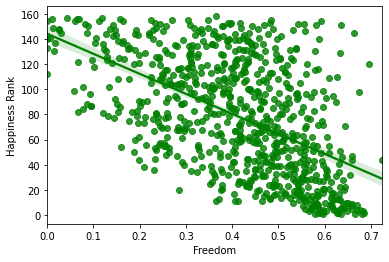

In [345]:
sns.regplot(alldata['Freedom'],alldata['Happiness Rank'], color="g")
plt.show()
# 자유도가 높을수록 비교적 행복 순위가 떨어지는 경향을 보임을 알 수 있다.